In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
housing_df = pd.read_csv(r'data/housing.csv')

housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


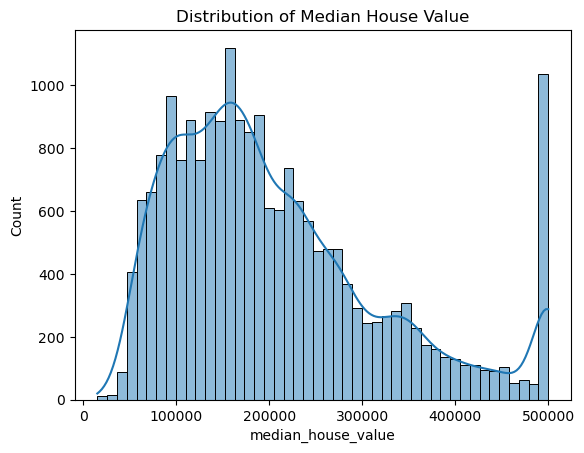

In [42]:
sns.histplot(housing_df['median_house_value'], kde=True)

plt.title('Distribution of Median House Value')
plt.show()

In [43]:
filtered_data = housing_df[housing_df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
columns_to_keep = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

subset_data = filtered_data[columns_to_keep]

In [44]:
subset_data.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [45]:
shuffled_data = subset_data.sample(frac=1, random_state=42)

train_size = int(0.6 * len(shuffled_data))
val_size = int(0.2 * len(shuffled_data))

train_data = shuffled_data[:train_size]
val_data = shuffled_data[train_size:train_size+val_size]
test_data = shuffled_data[train_size+val_size:]

In [46]:
train_data.loc[:, 'median_house_value'] = np.log1p(train_data['median_house_value'])
val_data.loc[:, 'median_house_value'] = np.log1p(val_data['median_house_value'])
test_data.loc[:, 'median_house_value'] = np.log1p(test_data['median_house_value'])

In [47]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [48]:
train_data.iloc[10]

latitude                36.3200
longitude             -119.3400
housing_median_age      14.0000
total_rooms           1204.0000
total_bedrooms         227.0000
population             633.0000
households             247.0000
median_income            3.9250
median_house_value      11.3362
Name: 10, dtype: float64

In [49]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [50]:
# Handling missing values

# Filling with 0
train_data_zero = train_data.copy()
val_data_zero = val_data.copy()
test_data_zero = test_data.copy()

train_data_zero.loc[:, 'total_bedrooms'] = train_data_zero['total_bedrooms'].fillna(0)
val_data_zero.loc[:, 'total_bedrooms'] = val_data_zero['total_bedrooms'].fillna(0)
test_data_zero.loc[:, 'total_bedrooms'] = test_data_zero['total_bedrooms'].fillna(0)

# Filling with the Mean
mean_bedrooms = train_data['total_bedrooms'].mean()

train_data_mean = train_data.copy()
val_data_mean = val_data.copy()
test_data_mean = test_data.copy()

train_data_mean.loc[:, 'total_bedrooms'] = train_data_mean['total_bedrooms'].fillna(mean_bedrooms)
val_data_mean.loc[:, 'total_bedrooms'] = val_data_mean['total_bedrooms'].fillna(mean_bedrooms)
test_data_mean.loc[:, 'total_bedrooms'] = test_data_mean['total_bedrooms'].fillna(mean_bedrooms)

In [51]:
y_train = train_data_mean.median_house_value.values
y_val = val_data_mean.median_house_value.values
y_test = test_data_mean.median_house_value.values

In [52]:
del train_data_mean['median_house_value']
del val_data_mean['median_house_value']
del test_data_mean['median_house_value']

In [53]:
X_train = train_data_mean.values

In [54]:
w0, w = train_linear_regression(X_train, y_train)

In [55]:
y_pred = w0 + X_train.dot(w)

In [56]:
len(y_pred)

9412

<Axes: ylabel='Count'>

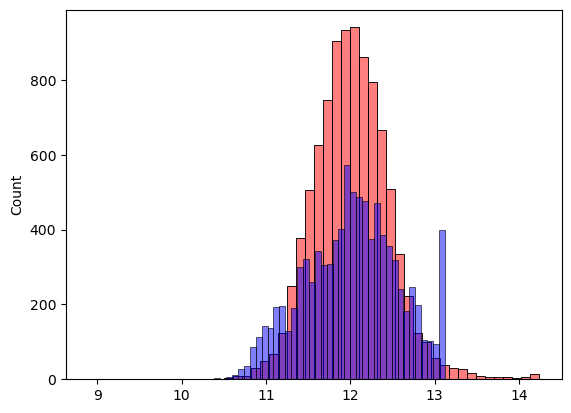

In [57]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [58]:
y_train_zero = train_data_zero.median_house_value.values
y_val_zero = val_data_zero.median_house_value.values
y_test_zero = test_data_zero.median_house_value.values

In [59]:
del train_data_zero['median_house_value']
del val_data_zero['median_house_value']
del test_data_zero['median_house_value']

In [60]:
X_train_zero = train_data_zero.values
w0, w = train_linear_regression(X_train_zero, y_train_zero)
y_pred_zero = w0 + X_train_zero.dot(w)

<Axes: ylabel='Count'>

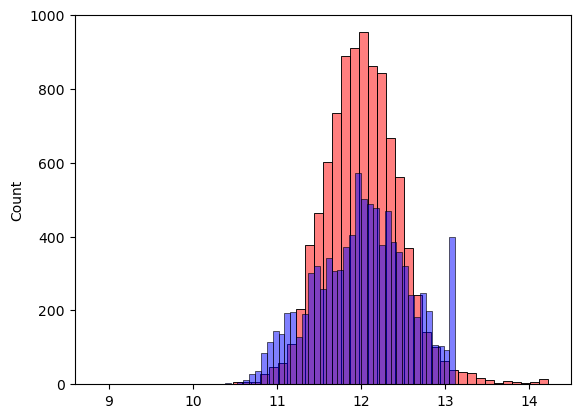

In [61]:
sns.histplot(y_pred_zero, color='red', alpha=0.5, bins=50)
sns.histplot(y_train_zero, color='blue', alpha=0.5, bins=50)

In [62]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [63]:
rmse_mean = rmse(y_train, y_pred)
rmse_zero = rmse(y_train_zero, y_pred_zero)

print(f"Mean RMSE: {rmse_mean}")
print(f"Zero RMSE: {rmse_zero}")


Mean RMSE: 0.3400210408486527
Zero RMSE: 0.34026338880030066


In [64]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [65]:
r_choices = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for i in range(len(r_choices)):
    r = r_choices[i]
    w0, w = train_linear_regression_reg(X_train_zero, y_train_zero, r)
    y_pred_zero = w0 + X_train_zero.dot(w)
    rmse_r = rmse(y_train_zero, y_pred_zero)
    print(f"RMSE for r = {r}: {rmse_r}")


RMSE for r = 0: 0.34026338880030066
RMSE for r = 1e-06: 0.3402633888003322
RMSE for r = 0.0001: 0.3402633891148595
RMSE for r = 0.001: 0.34026342013683036
RMSE for r = 0.01: 0.3402664067465395
RMSE for r = 0.1: 0.3404777580298951
RMSE for r = 1: 0.343492994025147
RMSE for r = 5: 0.34608978206790025
RMSE for r = 10: 0.34662304571757624


In [74]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_values = []

for seed_value in seed_values:
    shuffled_data = subset_data.sample(frac=1, random_state=seed_value)
    train_data = shuffled_data[:train_size]
    val_data = shuffled_data[train_size:train_size+val_size]
    test_data = shuffled_data[train_size+val_size:]
    
    train_data.loc[:, 'median_house_value'] = np.log1p(train_data['median_house_value'])
    val_data.loc[:, 'median_house_value'] = np.log1p(val_data['median_house_value'])
    test_data.loc[:, 'median_house_value'] = np.log1p(test_data['median_house_value'])
    
    train_data = train_data.reset_index(drop=True)
    val_data = val_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)

    # Filling with 0
    train_data_zero = train_data.copy()
    val_data_zero = val_data.copy()
    test_data_zero = test_data.copy()

    train_data_zero.loc[:, 'total_bedrooms'] = train_data_zero['total_bedrooms'].fillna(0)
    val_data_zero.loc[:, 'total_bedrooms'] = val_data_zero['total_bedrooms'].fillna(0)
    test_data_zero.loc[:, 'total_bedrooms'] = test_data_zero['total_bedrooms'].fillna(0)
    
    # Extract y values BEFORE deleting the median_house_value column
    y_train_zero = train_data_zero.median_house_value.values
    y_val_zero = val_data_zero.median_house_value.values
    y_test_zero = test_data_zero.median_house_value.values

    # Now, delete the median_house_value column
    del train_data_zero['median_house_value']
    del val_data_zero['median_house_value']
    del test_data_zero['median_house_value']
    
    X_train_zero = train_data_zero.values
    X_val_zero = val_data_zero.values
    w0, w = train_linear_regression(X_val_zero, y_val_zero)
    y_pred_zero = w0 + X_val_zero.dot(w)
    rmse_values.append(rmse(y_val_zero, y_pred_zero))
    print(f"Error for seed {seed_value}: {rmse(y_val_zero, y_pred_zero)}")

#Standard deviation

std_deviation = round(np.std(rmse_values), 3)
print(std_deviation)
    
    

Error for seed 0: 0.3368602339124655
Error for seed 1: 0.33731760902802843
Error for seed 2: 0.3374958974865375
Error for seed 3: 0.3311591975749827
Error for seed 4: 0.33703867214612704
Error for seed 5: 0.34180673332890316
Error for seed 6: 0.3340376835510002
Error for seed 7: 0.34375187673890945
Error for seed 8: 0.3497326362951754
Error for seed 9: 0.3335822461295431
0.005


In [78]:
shuffled_data = subset_data.sample(frac=1, random_state=9)
train_data = shuffled_data[:train_size]
val_data = shuffled_data[train_size:train_size+val_size]
test_data = shuffled_data[train_size+val_size:]

train_data.loc[:, 'median_house_value'] = np.log1p(train_data['median_house_value'])
val_data.loc[:, 'median_house_value'] = np.log1p(val_data['median_house_value'])
test_data.loc[:, 'median_house_value'] = np.log1p(test_data['median_house_value'])

train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Filling with 0
train_data_zero = train_data.copy()
val_data_zero = val_data.copy()
test_data_zero = test_data.copy()

train_data_zero.loc[:, 'total_bedrooms'] = train_data_zero['total_bedrooms'].fillna(0)
val_data_zero.loc[:, 'total_bedrooms'] = val_data_zero['total_bedrooms'].fillna(0)
test_data_zero.loc[:, 'total_bedrooms'] = test_data_zero['total_bedrooms'].fillna(0)

train_val_data_zero = pd.concat([train_data_zero, val_data_zero], ignore_index=True)

# Extract y values BEFORE deleting the median_house_value column
y_train_zero = train_data_zero.median_house_value.values
y_val_zero = val_data_zero.median_house_value.values
y_test_zero = test_data_zero.median_house_value.values
y_train_val_zero = train_val_data_zero.median_house_value.values

# Now, delete the median_house_value column
del train_data_zero['median_house_value']
del val_data_zero['median_house_value']
del test_data_zero['median_house_value']
del train_val_data_zero['median_house_value']

X_train_zero = train_data_zero.values
X_train_val_zero = train_val_data_zero.values
X_test_zero = test_data_zero.values
X_val_zero = val_data_zero.values
w0, w = train_linear_regression(X_train_val_zero, y_train_val_zero)
y_pred_zero = w0 + X_test_zero.dot(w)
print(f"Error for seed {seed_value}: {rmse(y_test_zero, y_pred_zero)}")

Error for seed 9: 0.33495227474462863
